In [1]:
# 📦 Install all required libraries
!pip install pandas matplotlib nltk vaderSentiment
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

# Load your uploaded lyrics.csv
df = pd.read_csv("lyrics.csv")

# Show the first 5 rows
df.head()


,artist,song,lyrics
0,Eminem,Not Afraid,"I'm not afraid to take a stand, everyone come ..."
1,Adele,Hello,"Hello from the other side, I must have called ..."
2,Drake,God's Plan,"I been movin' calm, don't start no trouble wit..."
3,Rihanna,Diamonds,"Shine bright like a diamond, we're beautiful l..."
4,Taylor Swift,Blank Space,"Cause we got a long list of ex-lovers, they'll..."


In [3]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Clean lyrics: remove punctuation, lowercase, normalize whitespace
df['lyrics_clean'] = df['lyrics'].str.replace(r'[^\w\s]', '', regex=True)
df['lyrics_clean'] = df['lyrics_clean'].str.lower().str.replace(r'\s+', ' ', regex=True).str.strip()

# Run sentiment analysis
analyzer = SentimentIntensityAnalyzer()
df['vader_compound'] = df['lyrics_clean'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Preview updated DataFrame
df[['song', 'lyrics_clean', 'vader_compound']].head()


,song,lyrics_clean,vader_compound
0,Not Afraid,im not afraid to take a stand everyone come ta...,0.4939
1,Hello,hello from the other side i must have called a...,0.0000
2,God's Plan,i been movin calm dont start no trouble with me,0.0949
3,Diamonds,shine bright like a diamond were beautiful lik...,0.9217
4,Blank Space,cause we got a long list of exlovers theyll te...,-0.4019


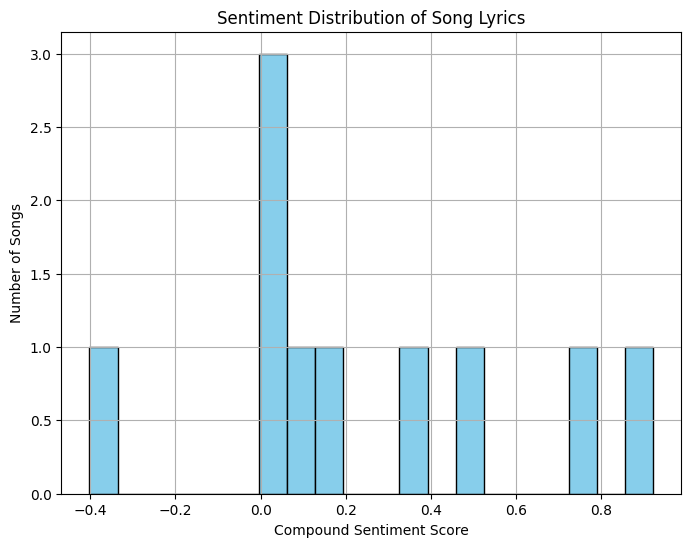

In [4]:
import matplotlib.pyplot as plt

# Plot histogram of sentiment scores
plt.figure(figsize=(8,6))
plt.hist(df['vader_compound'], bins=20, edgecolor='black', color='skyblue')
plt.title('Sentiment Distribution of Song Lyrics')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()


In [5]:
df.to_csv("cleaned_lyrics.csv", index=False)